In [1]:
import numpy as np
import sklearn
from matplotlib import pyplot as plt
from sklearn import datasets
from sklearn import linear_model
import sklearn
%matplotlib inline

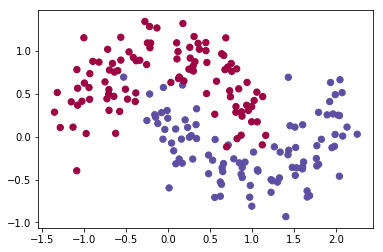

In [2]:
np.random.seed(0)
X, y = datasets.make_moons(200, noise=0.2)
plt.scatter(X[:, 0], X[:, 1], s=40, c=y, cmap=plt.cm.Spectral)


In [3]:
def plot_decision_boundary(pred_func):
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    h = 0.01
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = pred_func(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Spectral)

Text(0.5,1,'Logistic Regression')

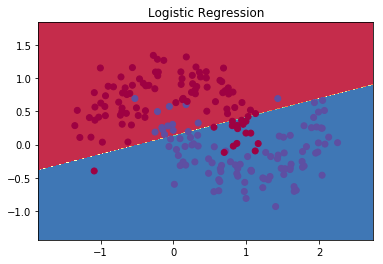

In [4]:
clf = linear_model.LogisticRegressionCV()
clf.fit(X,y)

plot_decision_boundary(lambda x: clf.predict(x))
plt.title('Logistic Regression')

Text(0.5,1,'Logistic Regression')

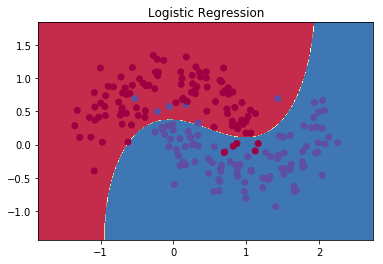

In [5]:
clf = sklearn.svm.SVC()
clf.fit(X,y)

plot_decision_boundary(lambda x: clf.predict(x))
plt.title('Logistic Regression')

# NN Implementation

In [6]:
num_examples = len(X)
nn_input_dim = 2
nn_output_dim = 2

epsilon = 0.01
reg_lambda = 0.01

In [7]:
def calculate_loss(model):
    W1, b1, W2, b2 = model['W1'], model['b1'], model['W2'], model['b2'],
    z1 = X.dot(W1) + b1
    a1 = np.tanh(z1)
    z2 = a1.dot(W2) + b2
    exp_scores = np.exp(z2)
    probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True)
    correct_logprobs = -np.log(probs[range(num_examples), y])
    data_loss = np.sum(correct_logprobs)
    data_loss += reg_lambda / 2 * (np.sum(np.square(W1)) + np.sum(np.square(W2)))
    return 1./ num_examples * data_loss

In [8]:
def predict(modelm, x):
    W1, b1, W2, b2 = model['W1'], model['b1'], model['W2'], model['b2'],
    z1 = x.dot(W1) + b1
    a1 = np.tanh(z1)
    z2 = a1.dot(W2) + b2
    exp_scores = np.exp(z2)
    probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True)
    return np.argmax(probs, axis=1)

In [9]:
def build_model(nn_hdim, num_passes = 20000, print_loss=False):
    np.random.seed(0)
    W1 = np.random.randn(nn_input_dim, nn_hdim) / np.sqrt(nn_input_dim)
    b1 = np.zeros((1, nn_hdim))
    W2 = np.random.randn(nn_hdim, nn_output_dim) / np.sqrt(nn_hdim)
    b2 = np.zeros((1, nn_output_dim))
    
    model = {}
    
    for i in range(0, num_passes):
        z1 = X.dot(W1) + b1
        a1 = np.tanh(z1)
        z2 = a1.dot(W2) + b2
        exp_scores = np.exp(z2)
        probs = exp_scores / np.sum(exp_scores, axis=1, keepdims = True)
        
        delta3 = probs
        delta3[range(num_examples), y] -= 1
        dW2 = (a1.T).dot(delta3)
        db2 = np.sum(delta3, axis=0, keepdims=True)
        delta2 = delta3.dot(W2.T) * (1 - np.power(a1, 2))
        dW1 = np.dot(X.T, delta2)
        db1 = np.sum(delta2, axis=0)
        
        dW2 += reg_lambda * W2
        dW1 += reg_lambda * W1
        
        W1 += -epsilon * dW1
        b1 += -epsilon * db1
        W2 += -epsilon * dW2
        b2 += -epsilon * db2
        
        model = {'W1': W1, 'b1': b1, 'W2': W2, 'b2': b2}
        
        if print_loss and i %1000 == 0: 
            print(i, calculate_loss(model))
    return model

0 0.432386631525
1000 0.0689465381198
2000 0.0690332780883
3000 0.070751947775
4000 0.0707483158638
5000 0.0707511996051
6000 0.0707540726766
7000 0.0707560598987
8000 0.0707572762319
9000 0.0707579586514
10000 0.0707583016809
11000 0.070758440362
12000 0.0707584622968
13000 0.0707584220407
14000 0.0707583524308
15000 0.0707582725155
16000 0.0707581928167
17000 0.0707581187128
18000 0.0707580525644
19000 0.0707579950237


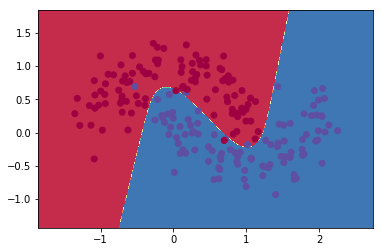

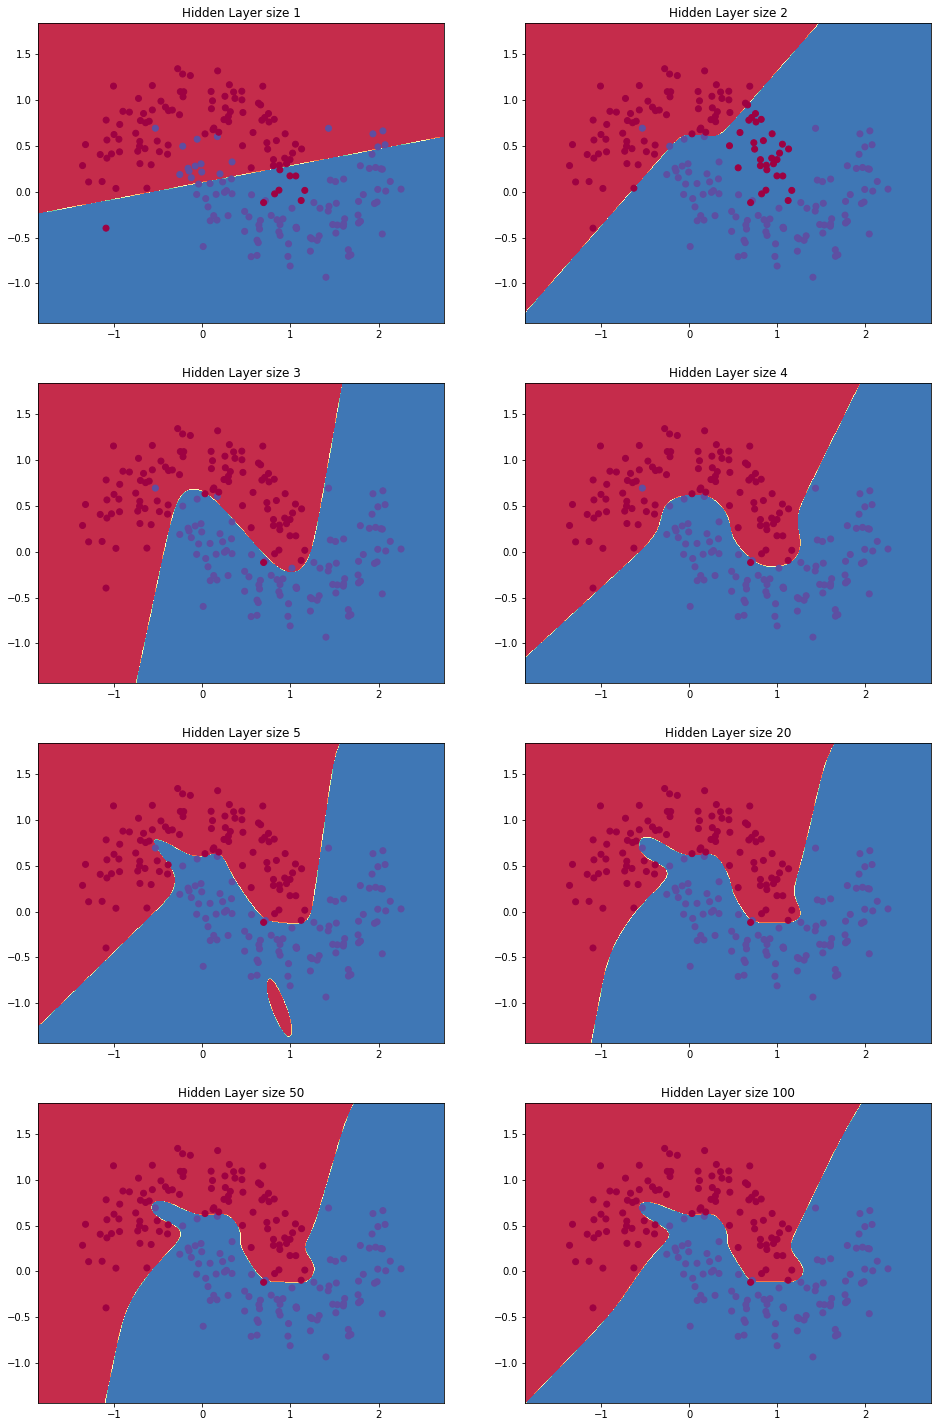

In [10]:
model = build_model(3, print_loss=True)
plot_decision_boundary(lambda x: predict(model, x))

plt.figure(figsize=(16, 32))
hidden_layer_dimensions = [1, 2, 3, 4, 5, 20, 50, 100]
for i, nn_hdim in enumerate(hidden_layer_dimensions):
    plt.subplot(5, 2, i + 1)
    plt.title('Hidden Layer size %d' % nn_hdim)
    model = build_model(nn_hdim)
    plot_decision_boundary(lambda x: predict(model, x))

